<a href="https://colab.research.google.com/github/disuja7/Bike-sharing-demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

**Project type** - Regression

**Contribution** - Individual

**Index :**

1. Problem Description
2. Data Description
3. Importing dataset and the libraries
4. Understanding the data
5. Data cleaning and basic feature engineering
6. Exploratory data analysis
7. ML Model Selection
8. ML Model Implementation
9. XG boost model explainability with SHAP plots
10. Results
11. Summary and conclusions
12. References



## <b>1. Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

### **Businees Goal**
### We are required to do basic EDA on the given data for the city Seoul and analyse the trend of the dependent variable(Number of bikes rented per hour) based on the features available.
### Finally we have predict the number of bikes required per hour for renting to accomplish the demand and supply requirement using a suitable model with a great accuracy.


## <b>2. Data Description </b>




### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## <b>3.Importing dataset and the libraries </b>

In [301]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [303]:
file_path = '/content/drive/MyDrive/DATA/SeoulBikeData.csv'

In [304]:
#Loading dataset
df = pd.read_csv(file_path,encoding="ISO-8859-1")

## <b>4.Understanding the data</b>

In [305]:
#Preveiw top 5 datasets
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [306]:
df.shape

(8760, 14)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [308]:
# checking for duplicate
len(df[df.duplicated()])

0

In [309]:
# checking null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No any null data present

In [310]:
#summary of the data
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN



## <b>5.Data cleaning and basic feature engineering</b>

In [311]:
#Converting the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])


**5.1 Creating new features from 'Date'**

In [312]:
#Breaking Down the Date into 3 Components
df['WeekDay']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [313]:
# Days between which the data is collected
print('Start date: ',df['Date'].min())
print('End date: ',df['Date'].max())

Start date:  2017-01-12 00:00:00
End date:  2018-12-11 00:00:00


**5.2 Dropping unecessary columns**

In [314]:
#Dropping the unnecessary 'Date' column
df.drop(['Date'],axis=1,inplace=True)

In [315]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017


## <b>6.Exploratory data analysis</b>

### **6.1 Distribution of Dependent variable**

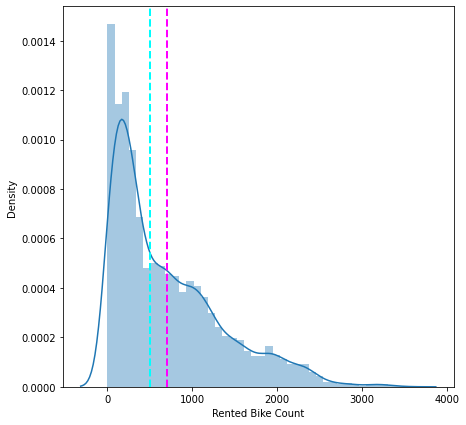

In [316]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'])
plt.axvline((df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.axvline((df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)

In [317]:
# skew of the dependent variable
df['Rented Bike Count'].skew()

1.1534281773679014

Since the dependent variable is right or positive skewed, we will try make it normal using transformations

**Log transformation:**

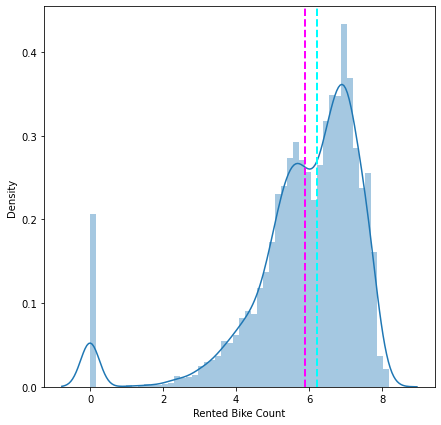

In [318]:
# Log transformation of dependent variable to get normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.log1p(df['Rented Bike Count']))
plt.axvline(np.log1p(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)

In [319]:
# skew of the dependent variable after log transformation
np.log1p(df['Rented Bike Count']).skew()

-1.8321986426412804

Log transformation has made it left/ngative skewed with greater magnitude and also created two peak points. So we will try other transformations.

**Square-root transformation:**

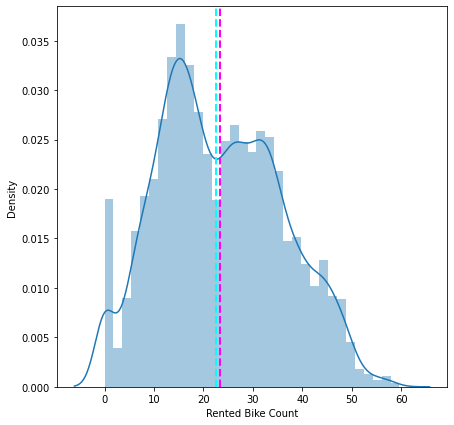

In [320]:
# Log transformation of dependent variable to get normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']))
plt.axvline(np.sqrt(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)

In [321]:
# skew of the dependent variable after log transformation
np.sqrt(df['Rented Bike Count']).skew()

0.237362090985412

This transformation seems to be suitable as it has generated approximately a normal distribution with low skew value.
Hence we will use square root transformation on dependent variable while modeling.

### **6.2 Anysing the distribution of independent variables**

**Distribution of numerical continuous features**

In [322]:
numerical_features = df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Year'],
      dtype='object')

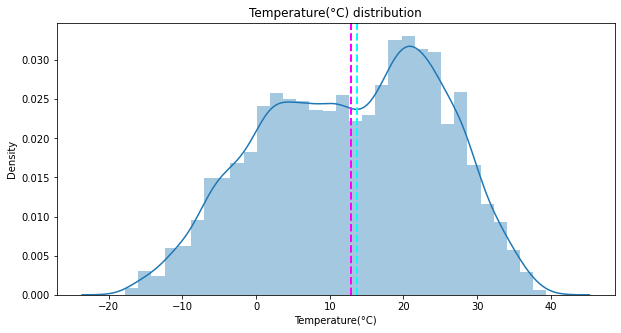

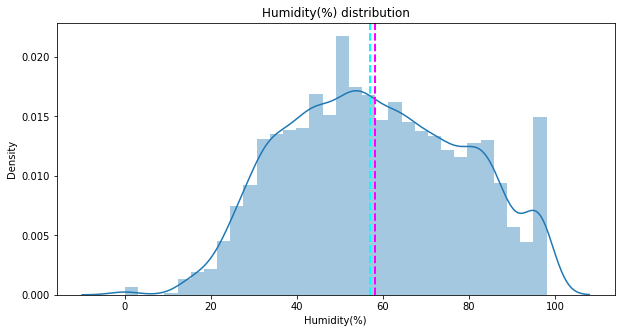

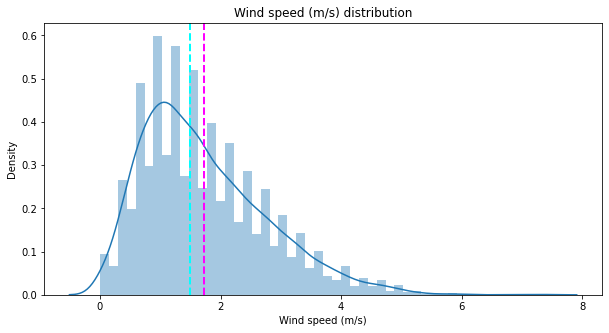

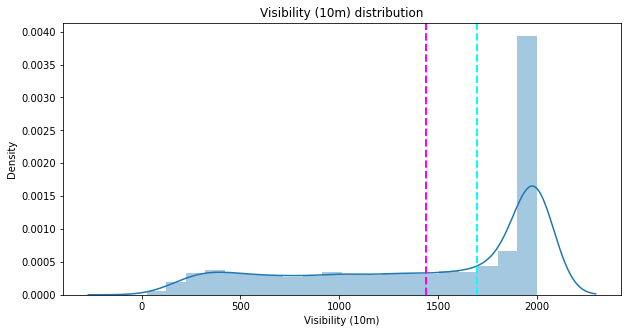

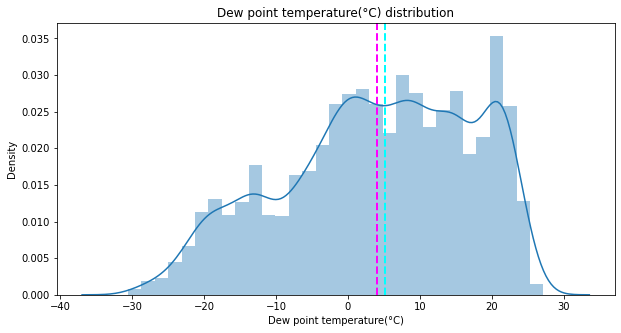

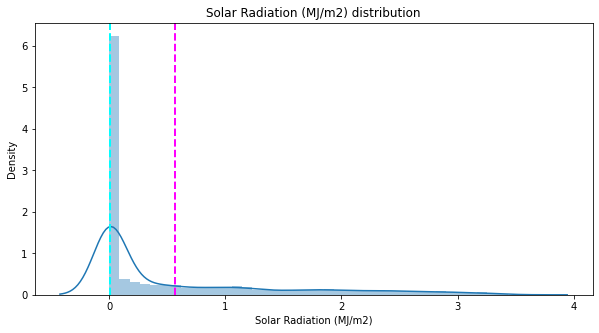

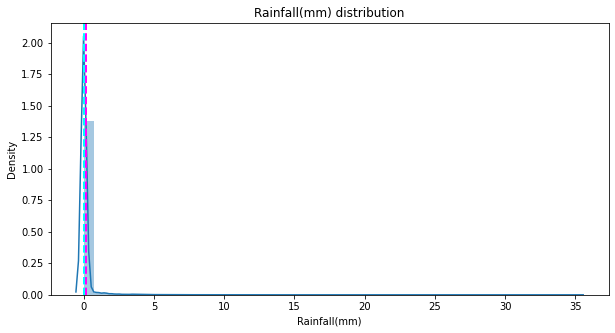

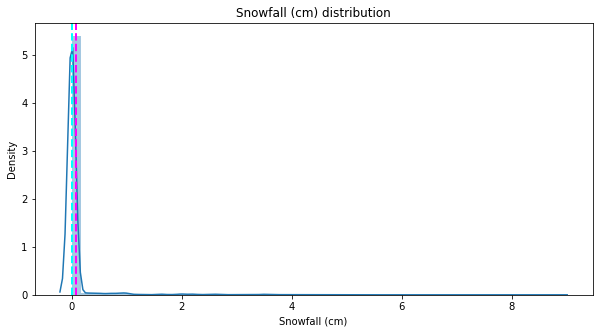

In [323]:
for col in numerical_features[2:-2]:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Summary:**

* Normally distributed variables: Temperature(°C),	Humidity(%)

* Positively skewed variables: Wind speed, Solar Radiation, Snowfall, Rainfall.

* Negatively skewed variables: Visibility.


**Distribution of categorical features with respect to dependent variable**

In [324]:
#Defining categorical features
categorical_features = df.describe(include=['object','category']).columns
categorical_features = list(categorical_features)
categorical_features.extend(['Hour','Month','Year'])
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'WeekDay', 'Hour', 'Month', 'Year']

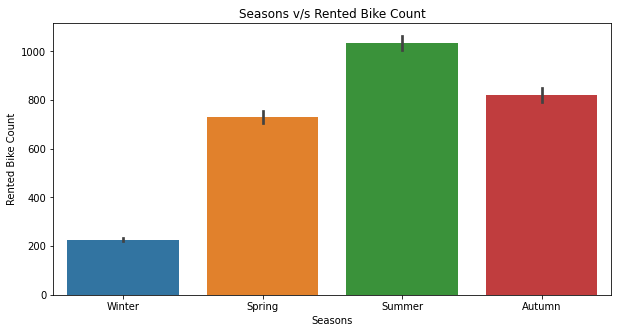

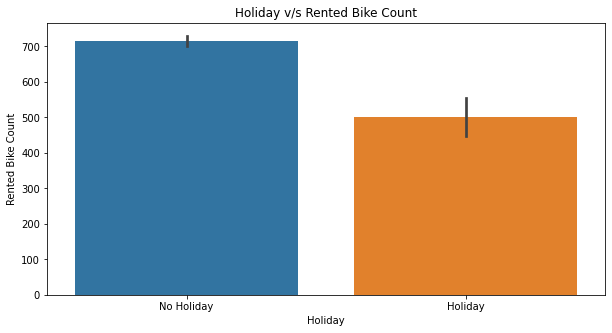

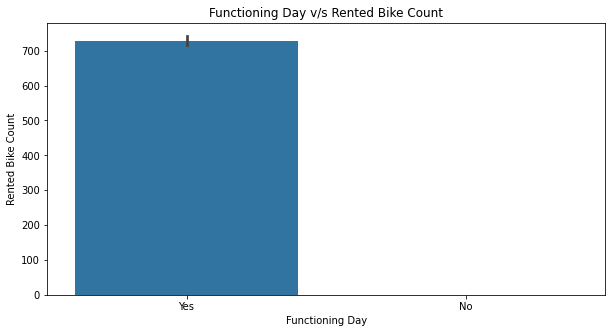

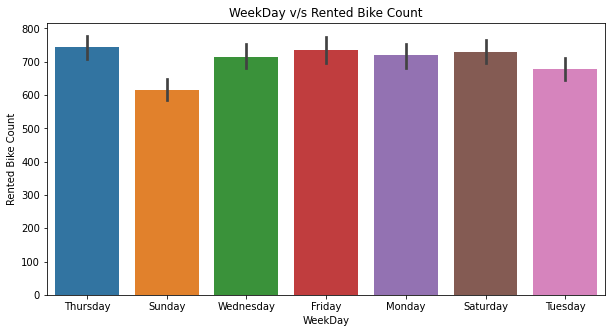

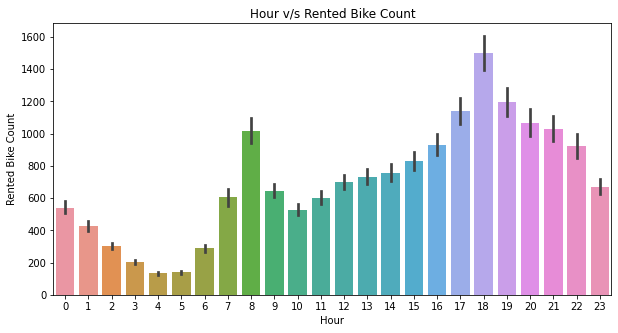

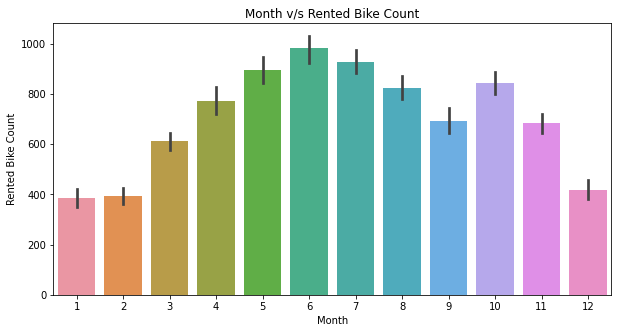

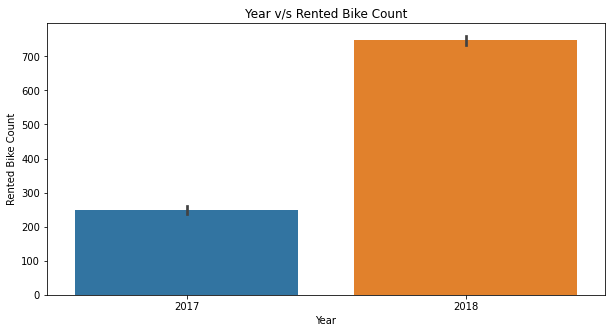

In [325]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.barplot(x=col,y=df['Rented Bike Count'],data=df)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  plt.title(col+' v/s '+ 'Rented Bike Count')
  plt.show()

**Summary:**

* The number of bikes rented is higher during the rush hours - which is due to the office timings.

* People prefer to rent bike most in summer and least in winter which can be also observed in month v/s number of bike rented plot as it is rented most during the month of may,june,july which is summer.

* The number of bikes rented is higher on working days than on non working days which is again due to office people.

* On a non functioning day, there were no any bikes rented at all.

* The number of bikes rented based on weekday is hard to understand but it is for sure that it is least on sunday.

* As compared to 2017, there is a huge growth in the bike renting demand for the year 2018.

* **Overall from these plots it can be said that temperature and the office people are two major factors contributing for high demand of bike renting services.**

In [326]:
# Removing the dataset for Non functioning day as there was no bike rented.
df=df[df['Functioning Day']!='No']

In [327]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017


In [328]:
df.shape

(8465, 16)

### **6.3 Correlation Analysis**

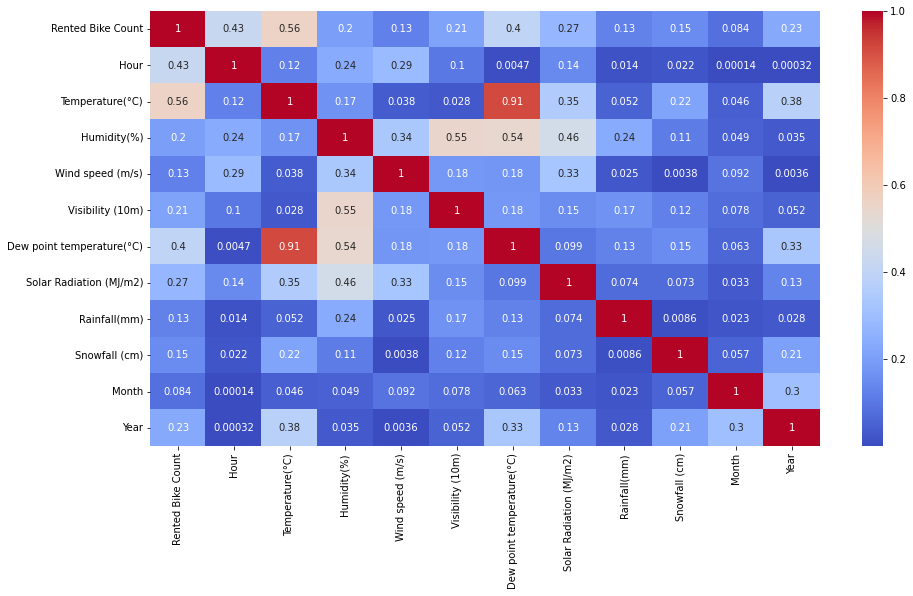

In [329]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The only strong correlation is between Temperature and Dew Point temperature which is quite obivious as we already know that there is a relation that exist between them.
We can remove this colinearity  

In [330]:
### removing multicollearity by introducing a new feature using weighted average of the two correlated features
df['Temperature_factor'] = 0.6*df['Temperature(°C)'] + 0.4*df['Dew point temperature(°C)']

### **6.4 Feature Engineering and Data preprocessing**

In [331]:
new_df = df.copy()
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year,Temperature_factor
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,-10.16
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,-10.34
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,-10.68
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,-10.76
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,-11.04


In [332]:
#Mapping the categorical variables
new_df['Functioning Day']=new_df['Functioning Day'].map({'Yes':1,'No':0})
new_df['Holiday']=new_df['Holiday'].map({'No Holiday':0,'Holiday':1})

* Here 'Month' and 'Seasons' column basically represents the same information, So we will keep 'Month' and delete 'Seasons'.

* Also we have created a 'Temperature_factor' feature using 'Temperature' and 'Due Point Temperature' column, So we need to delete both of them.

* Since our data is for functioning Day only (ie; it contains only boolean value 1), so the feature 'Functioning Day' has no importance in learning phase of model. Hence we will drop this column as well.

In [333]:
#Dropping the unnecessary columns
new_df.drop(['Seasons','Temperature(°C)','Dew point temperature(°C)','Functioning Day'],axis=1,inplace=True)

In [334]:
new_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,WeekDay,Month,Year,Temperature_factor
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,Thursday,1,2017,-10.16
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,Thursday,1,2017,-10.34
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,Thursday,1,2017,-10.68
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,Thursday,1,2017,-10.76
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,Thursday,1,2017,-11.04


* Since the variables - Hour, WeekDay, Month are the nomical categorical variables. We need to create dummy variables for them using One hot encoding.



In [335]:
# One hot encoding
new_df = pd.get_dummies(new_df, columns=["Hour","WeekDay","Month"])

In [336]:
new_df.head()

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Year,Temperature_factor,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,37,2.2,2000,0.0,0.0,0.0,0,2017,-10.16,...,0,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,0.0,0.0,0.0,0,2017,-10.34,...,0,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,0.0,0.0,0.0,0,2017,-10.68,...,0,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,0.0,0.0,0.0,0,2017,-10.76,...,0,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,0.0,0.0,0.0,0,2017,-11.04,...,0,0,0,0,0,0,0,0,0,0


In [337]:
new_df.shape

(8465, 53)

In [338]:
# New data info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Humidity(%)              8465 non-null   int64  
 2   Wind speed (m/s)         8465 non-null   float64
 3   Visibility (10m)         8465 non-null   int64  
 4   Solar Radiation (MJ/m2)  8465 non-null   float64
 5   Rainfall(mm)             8465 non-null   float64
 6   Snowfall (cm)            8465 non-null   float64
 7   Holiday                  8465 non-null   int64  
 8   Year                     8465 non-null   int64  
 9   Temperature_factor       8465 non-null   float64
 10  Hour_0                   8465 non-null   uint8  
 11  Hour_1                   8465 non-null   uint8  
 12  Hour_2                   8465 non-null   uint8  
 13  Hour_3                   8465 non-null   uint8  
 14  Hour_4                  

In [339]:
#checking for null values
new_df.isna().sum().sum()

0

No null values and out dataset is ready to go with model

In [340]:
# Creating a final dataset variable
final_df = new_df.copy()

# **7. Data Preprocessing**

## **7. Model Selection**

Here our task is to predict the number of bike required per hour for renting to fulfill the supply and demand. This task can be done using a regression model.
Now the question is which regression model should we use?

And the answer for this question depends on the business requirement. Since we know that as we increase the accuracy of prediction using complex models, the explainability of the model reduces, which might create an issue for the stakeholders.

Considering the above situations we can have three choices-


*   Simple model with low accuracy but high explainability
*   Complex model with high accuracy but low explainability
*   A compromised model between the above two cases

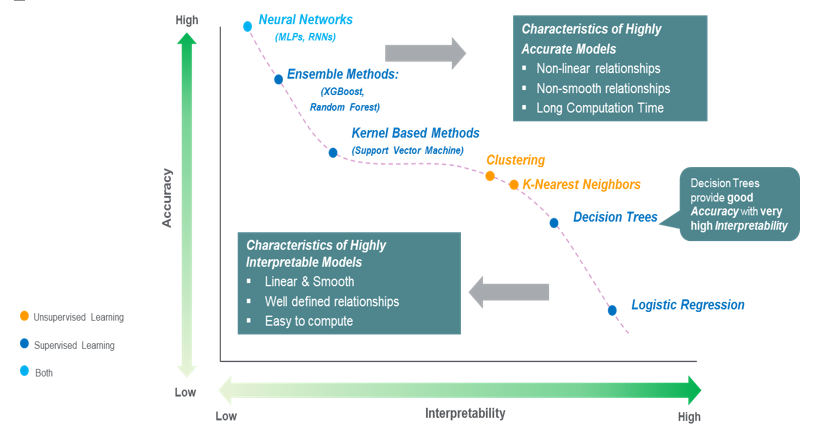

The above picture best explains the relationship between accuracy and interpretability of model

Now let us try to implement the regression model and observe the results.



# **7.2 Train test split**

In [341]:
X=final_df.drop('Rented Bike Count',axis=1)
y=np.log10(final_df['Rented Bike Count'])

In [342]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    evaluation_metric=(f'R^2 is {r2_score(10**(y_test), 10**(y_pred))}\n Adj R^2 is {1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))}\n RMSE is: {np.sqrt(mean_squared_error(10**(y_test), 10**(y_pred)))}')
    print(evaluation_metric)


R^2 is 0.590667854601717
 Adj R^2 is 0.5803552230316051
 RMSE is: 409.3559860687391


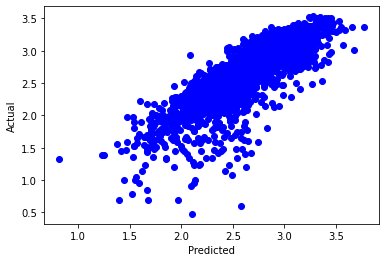

In [343]:
predict(LinearRegression(),X,y)

R^2 is 0.7444032132374394
 Adj R^2 is 0.7379637593073749
 RMSE is: 323.4751437666589


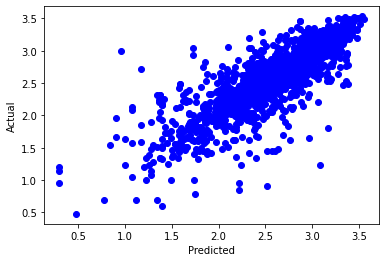

In [344]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),X,y)

R^2 is 0.8732290323551162
 Adj R^2 is 0.8700351901470087
 RMSE is: 227.81017744176913


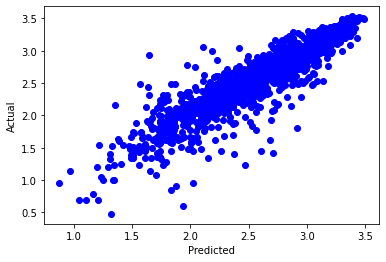

In [345]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),X,y)